In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Single Variable Regression

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has food trucks in various cities and you have data for profits and populations from the cities. You'd like to figure out what the expected profit of a new food truck might be given only the population of the city that it would be placed in. Predict the profits for a food track using simple regression based on the available data.

The file food_truck_data.txt contains the dataset for the problem. The data consists of two columns; the first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.


• Fit a linear model to the data

    o Compute the parameters of the model using gradient descent
    o Compute and plot the cost function as a function of the gradient descent iterations

In [2]:
# Load the training dataset
train = np.loadtxt(open("food_truck_data.txt"), delimiter=",")

In [3]:
m = train.shape[0]

In [4]:
train_X = train[:, 0].reshape(m,1)
train_y = train[:, 1]

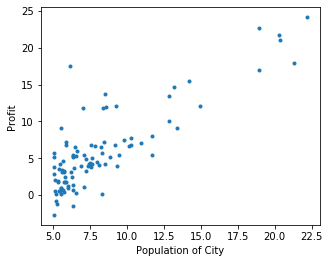

In [5]:
# plot the data
plt.figure(figsize=(5,4))
plt.plot(train_X, train_y, '.')
plt.xlabel('Population of City')
plt.ylabel('Profit')
plt.show()

## data fitting

To fit it with least squares, the liniear model is:
$$h_\beta(x) = \beta^{T}x = \beta_0 + \beta_1x_1$$

The objective function to minimize:
$$J(\beta) = \frac{1}{2m}\sum_{i=1}^m(h_\beta(x^{(i)})-y^{(i)})^2$$


And we use gradient descent to update beta:
$$\beta_j := \beta_j - \alpha\frac{1}{m}\sum_{i=1}^m (h_\beta(x^{(i)})-y^{(i)})x_{j}^{(i)}$$

In [6]:
# define functions for LS

#cost function
def cost(X, y, theta):
    m = X.shape[0]
    res = X.dot(theta) - y
    return res.T.dot(res)/2/m

# gradient descent
def gradient_descent(X, y, theta0, alpha, max_iter = 2000, eps = 1e-7):
    """
    theta0 : initial value for theta
    eps: thrshhold for convergency
    """
    i = 0
    theta = theta0
    converge = False
    costs = [0] * max_iter
    m = X.shape[0]
    while i < max_iter and not converge:
        m = X.shape[0]
        res = X.dot(theta) - y
        grad = X.T.dot(res)/m
        theta_new = theta - alpha * grad
        # decide convergency
        if np.linalg.norm(theta_new - theta) >= eps:
            theta = theta_new
        else:
            converge = True
        # store cost
        costs[i] = cost(X, y, theta)
        i += 1
    return theta, costs, i

In [8]:
alpha = 0.005
theta0 = np.array([0, 0])
iteration = 3000

# add constants to X
a = np.ones((m,1))
X = np.hstack((train_X, a))
X.shape



(97, 2)

In [9]:
(Theta, Cost, Iter) = gradient_descent(X, train_y, theta0, alpha, iteration)

In [10]:
# predicted theta parameters
print("Theta parameters are", Theta)

Theta parameters are [ 1.16632977 -3.62996716]


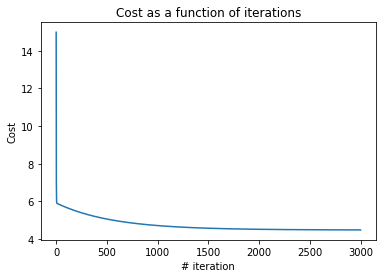

In [11]:
plt.plot(Cost)
plt.ylabel('Cost')
plt.xlabel('# iteration')
plt.title('Cost as a function of iterations')
plt.show()

Several step sizes are tried. A large alpha whill result in step size too large, it will not converge at final steps, or even overshoot at the very beginning.

We can see form the plot that the cost initially drops fast, then slows down. This is because of the shape of quadratic functions. Initially we are away from the optimal point and the gradient is large. As it apporaches the optimal, gradient becomes smaller and the change in cost becomes small.

##  Plot the data with the linear model

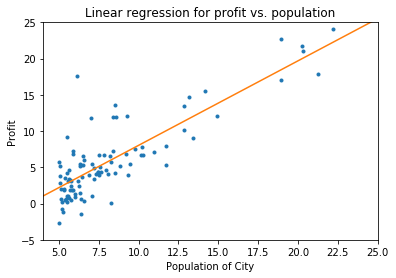

In [16]:
pred_X = np.linspace(0, 25, 10).reshape(10,1)
pred_X = np.hstack((pred_X, np.ones((10,1))))
pred_y = pred_X.dot(Theta)
plt.plot(train_X[:,0], train_y, '.')
plt.plot(pred_X, pred_y)
plt.xlabel('Population of City')
plt.ylabel('Profit')
plt.title('Linear regression for profit vs. population')
plt.axis([4,25,-5,25])
plt.show()

we can see that the line fits good with the data.

# 2. Multiple variables
Suppose you are selling your house and you want to know what a good market price would be. You can use available data on recent housing prices sold and learn a linear model.
The file housing_price_data.txt contains the dataset for the problem. The data consists of three columns; the first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

• Fit a linear model to the data 

    o Use featurescaling
    o Compute the parameters using gradient descent
    o Compute and plot the cost function as a function of the gradient descent iterations
    
• Assume features of your house and predict a good market price

In [18]:
# Load the training dataset
train2 = np.loadtxt(open("housing_price_data.txt"), delimiter=",")

In [19]:
train2.shape

(47, 3)

In [20]:
train_X = train2[:, 0:2]
train_y = train2[:, 2]

In [22]:
train_X.std(axis = 0)

array([7.86202619e+02, 7.52842809e-01])

In [26]:
class feature_scaler:
    """
    standatdize input to have uniform distribution
    """
    def __init__(self, X):
        self.mean = X.mean(axis=0)
        self.std = X.std(axis=0)
        
    def scale(self, X):
        X_std = (X - self.mean) / self.std
        return X_std

In [33]:
# normalize data
scaler = feature_scaler(train_X)
X = scaler.scale(train_X)

# add constants to X
m = X.shape[0]
X = np.hstack((X, np.ones((m,1))))
X.shape


(47, 3)

use the same function as question 1 and fit the least square

In [34]:
alpha = 0.005
theta0 = np.array([0, 0, 0])
iteration = 3000


In [35]:
(Theta, Cost, Iter) = gradient_descent(X, train_y, theta0, alpha, iteration)

In [36]:
# predicted theta parameters
print("Theta parameters are", Theta)

Theta parameters are [109369.48766356  -6500.04605454 340412.55928671]


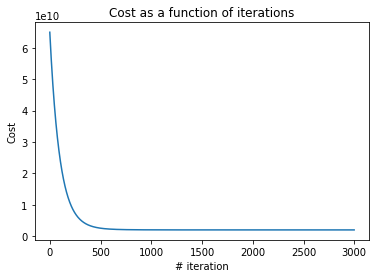

In [38]:
plt.plot(Cost)
plt.ylabel('Cost')
plt.xlabel('# iteration')
plt.title('Cost as a function of iterations')
plt.show()

We can see that the curve has the same trend as qustion 1, but is much smoother, since we did feature scaling.

## Assume features of your house and predict a good market price

Assume: size of the house (in square feet) is 3000, 3.000e+00, number of bedrooms is 4.

Thus the feature vector is (3000, 4)


In [46]:
x = np.array([3000, 4])
X = scaler.scale(x)
X = np.hstack((X, np.ones((1))))
y = X.dot(Theta)
print('Predicted house price is', y)

Predicted house price is 472264.5311896148
